Problem Statement No. 15 <br>
Consider the Amazon Alexa Reviews Dataset. This dataset consists of a nearly 3000 Amazon customer reviews (input
text), star ratings, date of review, variant and feedback of various amazon Alexa products like Alexa Echo, Echo dots,
Alexa Firesticks etc. Perform following operations on this dataset.
(I) Plot a graph of Positive and Negative Feedback (1 = Positive Feedback, 0 = Negative Feedback)
(II) Convert the review text into lowercase.
(III) Remove all punctuations from review text.
(IV) Remove emoticons and emojis from the text
(V) Tokenize the review text into words.
(VI) Remove the Stopwords from the tokenized text.

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string
import nltk

In [17]:
df = pd.read_csv("data/Alexa-Dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [18]:
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [19]:
df.shape

(3150, 5)

In [20]:
df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

([<matplotlib.axis.XTick at 0x7c7f834e6780>,
 [Text(0, 0, 'Negetive'), Text(1, 0, 'Positive')])

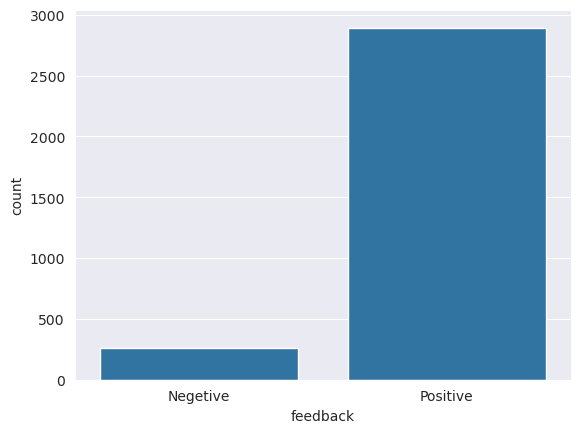

In [21]:
sns.countplot(df, x='feedback')
plt.xticks(ticks=[0, 1], labels=['Negetive', 'Positive'])

<Axes: xlabel='rating', ylabel='count'>

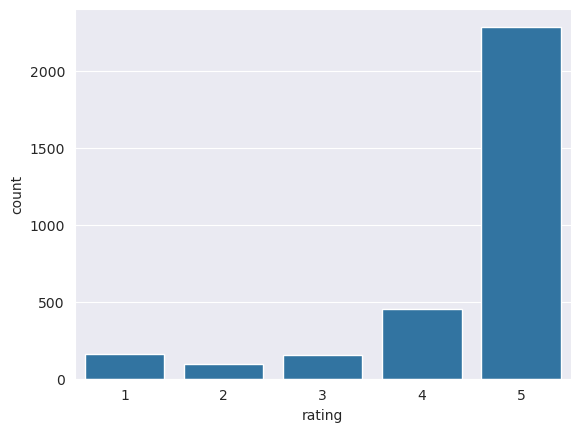

In [22]:
sns.countplot(df, x='rating')

In [23]:
df_pro = df.apply(lambda x: x.astype(str).str.lower() if x.dtype=='object' else x)
df_pro.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-jul-18,charcoal fabric,love my echo!,1
1,5,31-jul-18,charcoal fabric,loved it!,1
2,4,31-jul-18,walnut finish,"sometimes while playing a game, you can answer...",1
3,5,31-jul-18,charcoal fabric,i have had a lot of fun with this thing. my 4 ...,1
4,5,31-jul-18,charcoal fabric,music,1


In [24]:
def rem_punctuation(text):
    if isinstance(text, str):
        return "".join([c for c in text if c not in string.punctuation])
    return ""
df['clean_msg'] = df['verified_reviews'].apply(rem_punctuation)
df.head()

,rating,date,variation,verified_reviews,feedback,clean_msg
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,Love my Echo
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,Loved it
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,Sometimes while playing a game you can answer ...
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,I have had a lot of fun with this thing My 4 y...
4,5,31-Jul-18,Charcoal Fabric,Music,1,Music


In [25]:
def rm_imoticons(text):
    if isinstance(text, str):
        return re.sub(r"[^\w\s]", "", text)
    return ""

df['clean_msg'] = df['clean_msg'].apply(rm_imoticons)

In [26]:
df.head()

,rating,date,variation,verified_reviews,feedback,clean_msg
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,Love my Echo
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,Loved it
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,Sometimes while playing a game you can answer ...
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,I have had a lot of fun with this thing My 4 y...
4,5,31-Jul-18,Charcoal Fabric,Music,1,Music


In [27]:
def tokenize(text):
    tokens = re.split('\W+', text)
    return tokens
df['msg_tokenized'] = df['clean_msg'].apply(tokenize)
df.head()

<>:2: SyntaxWarning: invalid escape sequence '\W'
<>:2: SyntaxWarning: invalid escape sequence '\W'
/tmp/ipykernel_11887/3374704282.py:2: SyntaxWarning: invalid escape sequence '\W'
  tokens = re.split('\W+', text)


,rating,date,variation,verified_reviews,feedback,clean_msg,msg_tokenized
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,Love my Echo,"[Love, my, Echo]"
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,Loved it,"[Loved, it]"
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,Sometimes while playing a game you can answer ...,"[Sometimes, while, playing, a, game, you, can,..."
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,I have had a lot of fun with this thing My 4 y...,"[I, have, had, a, lot, of, fun, with, this, th..."
4,5,31-Jul-18,Charcoal Fabric,Music,1,Music,[Music]


In [28]:
from nltk.corpus import stopwords
nltk.download('stopwords')
STOPWORDS = set(stopwords.words('english'))
def rm_stopwords(text):
    return " ".join([word for word in text if word not in STOPWORDS])

df['review_stop'] = df['msg_tokenized'].apply(rm_stopwords)
df.head()

[nltk_data] Downloading package stopwords to /home/tammy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,rating,date,variation,verified_reviews,feedback,clean_msg,msg_tokenized,review_stop
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,Love my Echo,"[Love, my, Echo]",Love Echo
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,Loved it,"[Loved, it]",Loved
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,Sometimes while playing a game you can answer ...,"[Sometimes, while, playing, a, game, you, can,...",Sometimes playing game answer question correct...
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,I have had a lot of fun with this thing My 4 y...,"[I, have, had, a, lot, of, fun, with, this, th...",I lot fun thing My 4 yr old learns dinosaurs c...
4,5,31-Jul-18,Charcoal Fabric,Music,1,Music,[Music],Music
